# Report GPELab simulations

## Simulations with BMF effects

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x20c8f1d58b0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x20c8f236cd0>)

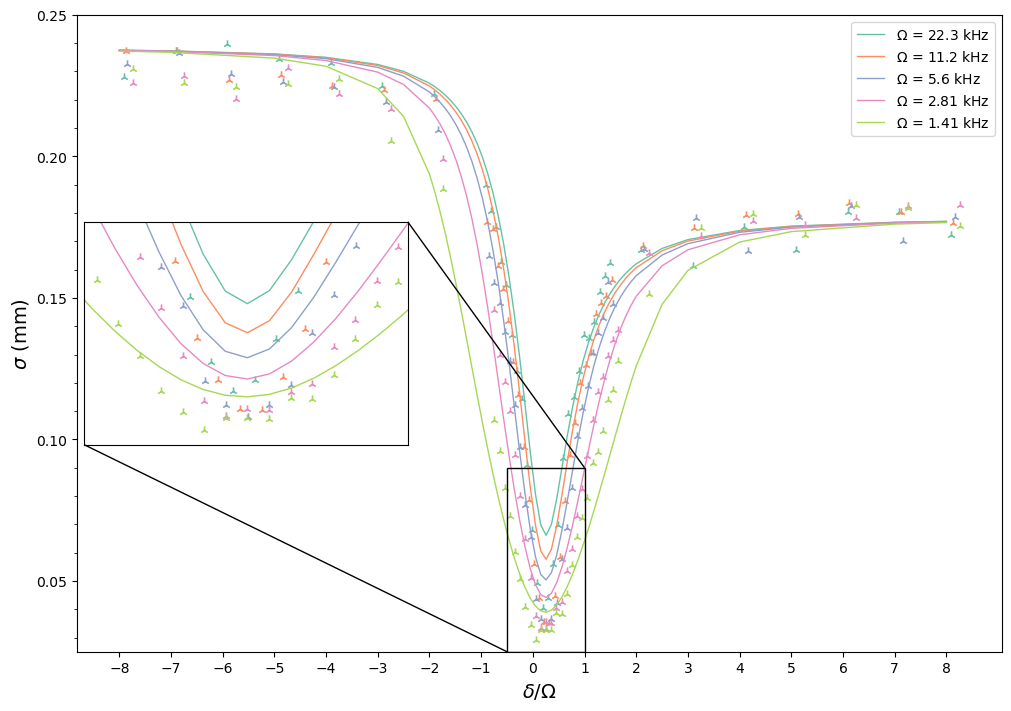

In [31]:
# Simulations with BMF effects added in modifying a12 in GPE simulation

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

#%% Import

Omega_values = [22300, 11200, 5600, 2810, 1410, 706]

#initialize simulation results
en = np.ones((len(Omega_values),52))
size = np.ones((len(Omega_values),52))
pop = np.ones((len(Omega_values),52))
delta_values = np.ones((len(Omega_values),52))

#initialize data exp
size_exp = np.ones((len(Omega_values),39))
scan_exp = np.ones((39))

location = r"C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\plot_code\Export\BMF-originalSc"
file = os.path.join(location, 'sim_0.txt')
en[0,:], size[0,:], pop[0,:], delta_values[0,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_1.txt')
en[1,:], size[1,:], pop[1,:], delta_values[1,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_2.txt')
en[2,:], size[2,:], pop[2,:], delta_values[2,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_3.txt')
en[3,:], size[3,:], pop[3,:], delta_values[3,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_4.txt')
en[4,:], size[4,:], pop[4,:], delta_values[4,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

# import experimental data
scan = scipy.io.loadmat(r'C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\exp_data\scan') 
scan_exp[:] = scan.get('valX').squeeze()

data = scipy.io.loadmat(r'C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\exp_data\MFdata') 
size_exp[4,:] = data.get('data1').squeeze() 
size_exp[3,:] = data.get('data2').squeeze()
size_exp[2,:] = data.get('data3').squeeze()
size_exp[1,:] = data.get('data4').squeeze()
size_exp[0,:] = data.get('data5').squeeze()


#%%
colors = plt.get_cmap('Set2').colors
lw = 1

labels = [r'$\Omega$ = 22.3 kHz', r'$\Omega$ = 11.2 kHz', r'$\Omega$ = 5.6 kHz', r'$\Omega$ = 2.81 kHz', r'$\Omega$ = 1.41 kHz', r'$\Omega$ = 706 Hz']
shift = [0.09, 0.122, 0.158, 0.257, 0.257, 0.376]

figS, axS = plt.subplots(1,1,constrained_layout=True, figsize=(10,7))
for i in range(5):
    Om = Omega_values[i]*2*np.pi
    
    axS.plot(delta_values[i,:], size[i,:]*10**3, label=labels[i], lw=lw, color=colors[i], zorder=1)
    axS.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])

xticks = np.linspace(-8,8,17)
axS.set_xticks(xticks)    
axS.set_xlabel(r'$\delta/\Omega$', fontsize=14)
axS.set_ylabel(r'$\sigma$ (mm)', fontsize=14)  
axS.set_ylim(0.025, 0.25)  
axS.yaxis.set_major_locator(MultipleLocator(0.05))
axS.yaxis.set_major_formatter('{x:.2f}')
axS.yaxis.set_minor_locator(MultipleLocator(0.01))
axS.legend()

# Create inset zoomed-in plot
axins = inset_axes(axS, width="35%", height="35%", loc="center left")  # Adjust size and position
for i in range(5):
    axins.plot(delta_values[i,:], size[i,:]*10**3, lw=lw, color=colors[i], zorder=1)
    axins.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])
# Set limits for zoomed-in region
axins.set_xlim(-0.5, 1)
axins.set_ylim(0.025, 0.09)
# Remove inset ticks for clarity
axins.set_xticks([])
axins.set_yticks([])
# Connect inset with main plot
mark_inset(axS, axins, loc1=1, loc2=3, fc="none", ec="black", lw=1)

## Comments: "simulations with BMF"
BMF effects added in the simulation modifying a12 <br>
We can appreciate how probably the experimental data do not capture as much BMF effect as we thought. At least we clearly see that in the simulations the BMF shift af delta=0 is larger then the shift in the data.
In fact we can calculate min point for all the curves and then evaluate the difference between the minima for the 22kHz curve and for the 1.4kHz curve. <br>
The result is:<br>
SIMULATION $\Delta = 0.027$ mm <br>
EXP DATA $\Delta = 0.0114$ mm
    
I could try to adjust the scattering length a11 and the density so to fit well the 22kHz curve. And then evaluate all the other curves for those parameters. <br>
In ordet to fit the 22kHz cirve I needed to lower $a_{11} \rightarrow a_{11} - 10 a_0$ and to higher the peak density $n_0 = 5.3e9$. The curve is so fitted well (see plot below). The problem is that for those parameters the lower Rabi curves can not be simulated because we so in the attractive region. This is the proof that the data do not have as much BMF effects. In addiction I know that for negative detuning the numper of atoms is lower than at the beginning of the sweep, so I expect the simulaiton to be abowe the data in this region.

I go back in simulating only MF effects.

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x20c8c53f340>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x20c8c57c8e0>)

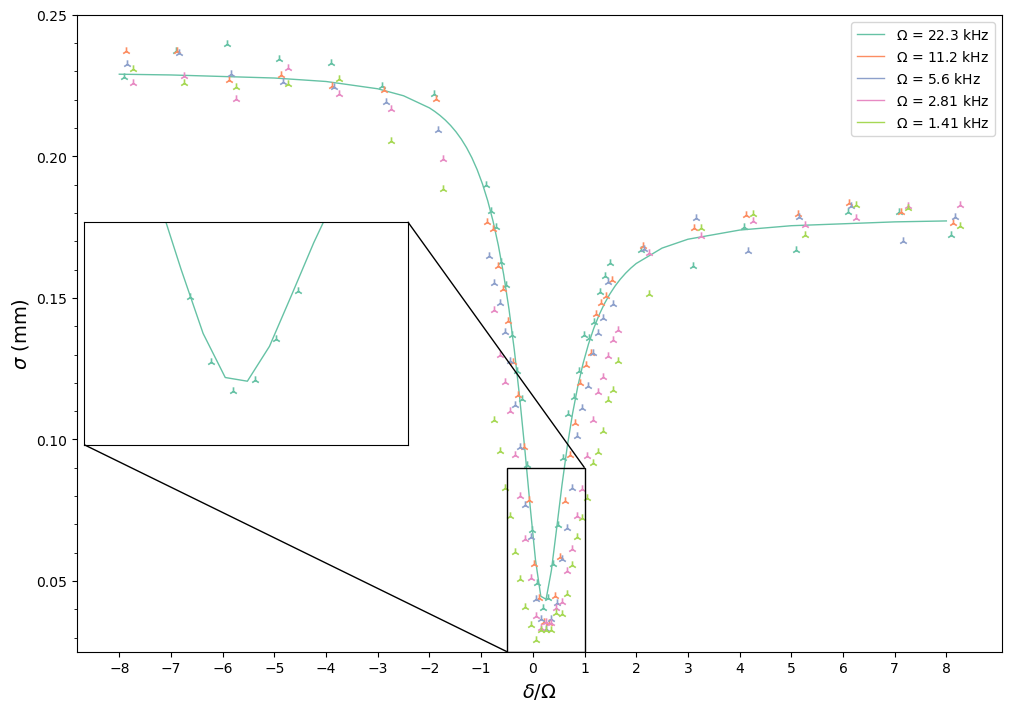

In [25]:
#initialize simulation results
en = np.ones((len(Omega_values),52))
size = np.ones((len(Omega_values),52))
pop = np.ones((len(Omega_values),52))
delta_values = np.ones((len(Omega_values),52))

location = r"C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\plot_code\Export\BMF_a11-10"
file = os.path.join(location, 'sim_0.txt')
en[0,:], size[0,:], pop[0,:], delta_values[0,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

#%%
colors = plt.get_cmap('Set2').colors
lw = 1

labels = [r'$\Omega$ = 22.3 kHz', r'$\Omega$ = 11.2 kHz', r'$\Omega$ = 5.6 kHz', r'$\Omega$ = 2.81 kHz', r'$\Omega$ = 1.41 kHz', r'$\Omega$ = 706 Hz']
shift = [0.09, 0.122, 0.158, 0.257, 0.257, 0.376]

figS, axS = plt.subplots(1,1,constrained_layout=True, figsize=(10,7))
for i in range(5):
    Om = Omega_values[i]*2*np.pi
    
    axS.plot(delta_values[i,:], size[i,:]*10**3, label=labels[i], lw=lw, color=colors[i], zorder=1)
    axS.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])

xticks = np.linspace(-8,8,17)
axS.set_xticks(xticks)    
axS.set_xlabel(r'$\delta/\Omega$', fontsize=14)
axS.set_ylabel(r'$\sigma$ (mm)', fontsize=14)  
axS.set_ylim(0.025, 0.25)  
axS.yaxis.set_major_locator(MultipleLocator(0.05))
axS.yaxis.set_major_formatter('{x:.2f}')
axS.yaxis.set_minor_locator(MultipleLocator(0.01))
axS.legend()

# Create inset zoomed-in plot
axins = inset_axes(axS, width="35%", height="35%", loc="center left")  # Adjust size and position
for i in range(1):
    axins.plot(delta_values[i,:], size[i,:]*10**3, lw=lw, color=colors[i], zorder=1)
    axins.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])
# Set limits for zoomed-in region
axins.set_xlim(-0.5, 1)
axins.set_ylim(0.025, 0.09)
# Remove inset ticks for clarity
axins.set_xticks([])
axins.set_yticks([])
# Connect inset with main plot
mark_inset(axS, axins, loc1=1, loc2=3, fc="none", ec="black", lw=1)

## MF simulations
If we run the simulation setting the Tiemann scattering lengths the min size of the curves is always (a lot) below the data. This we have now seen is not (mostly) because of BMF effects. We have so probably to adjust the a11 scattering length to higher the min points of the simulated sizes. <br> 
I put a11 + 2 

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x20c878d81c0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x20c885ee4f0>)

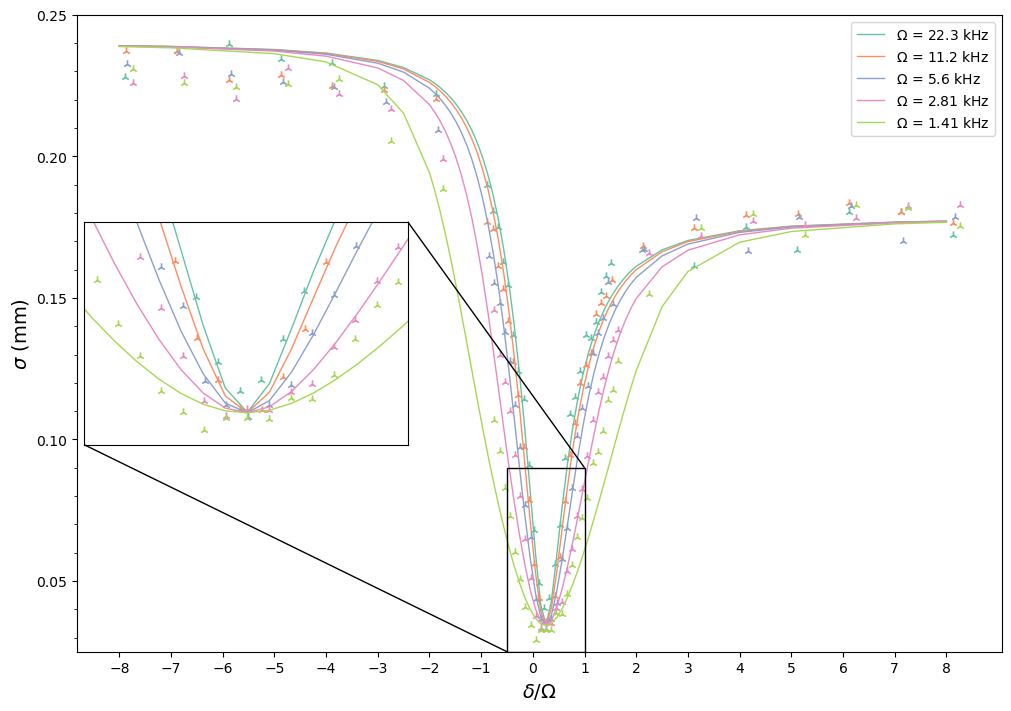

In [33]:
#initialize simulation results
en = np.ones((len(Omega_values),52))
size = np.ones((len(Omega_values),52))
pop = np.ones((len(Omega_values),52))
delta_values = np.ones((len(Omega_values),52))

location = r"C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\plot_code\Export\MF_a11+2"
file = os.path.join(location, 'sim_0.txt')
en[0,:], size[0,:], pop[0,:], delta_values[0,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_1.txt')
en[1,:], size[1,:], pop[1,:], delta_values[1,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_2.txt')
en[2,:], size[2,:], pop[2,:], delta_values[2,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_3.txt')
en[3,:], size[3,:], pop[3,:], delta_values[3,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_4.txt')
en[4,:], size[4,:], pop[4,:], delta_values[4,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

#%%
colors = plt.get_cmap('Set2').colors
lw = 1

labels = [r'$\Omega$ = 22.3 kHz', r'$\Omega$ = 11.2 kHz', r'$\Omega$ = 5.6 kHz', r'$\Omega$ = 2.81 kHz', r'$\Omega$ = 1.41 kHz', r'$\Omega$ = 706 Hz']
shift = [0.12, 0.122, 0.158, 0.257, 0.257, 0.376]

figS, axS = plt.subplots(1,1,constrained_layout=True, figsize=(10,7))
for i in range(5):
    Om = Omega_values[i]*2*np.pi
    
    axS.plot(delta_values[i,:], size[i,:]*10**3, label=labels[i], lw=lw, color=colors[i], zorder=1)
    axS.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])

xticks = np.linspace(-8,8,17)
axS.set_xticks(xticks)    
axS.set_xlabel(r'$\delta/\Omega$', fontsize=14)
axS.set_ylabel(r'$\sigma$ (mm)', fontsize=14)  
axS.set_ylim(0.025, 0.25)  
axS.yaxis.set_major_locator(MultipleLocator(0.05))
axS.yaxis.set_major_formatter('{x:.2f}')
axS.yaxis.set_minor_locator(MultipleLocator(0.01))
axS.legend()

# Create inset zoomed-in plot
axins = inset_axes(axS, width="35%", height="35%", loc="center left")  # Adjust size and position
for i in range(5):
    axins.plot(delta_values[i,:], size[i,:]*10**3, lw=lw, color=colors[i], zorder=1)
    axins.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])
# Set limits for zoomed-in region
axins.set_xlim(-0.5, 1)
axins.set_ylim(0.025, 0.09)
# Remove inset ticks for clarity
axins.set_xticks([])
axins.set_yticks([])
# Connect inset with main plot
mark_inset(axS, axins, loc1=1, loc2=3, fc="none", ec="black", lw=1)

I repeat the simulation but that tomi I set $a_{11} \rightarrow a_{11}+1.65$. I am trying to fit better the min for the 1.4 kHz curve (that one with less MF effects). Then I simulate the rest of the surves with the same paramenters. I note that the 1.4kHz curve in not fitting well the 3 body...

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x20c8bd5f6d0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x20c8bda1940>)

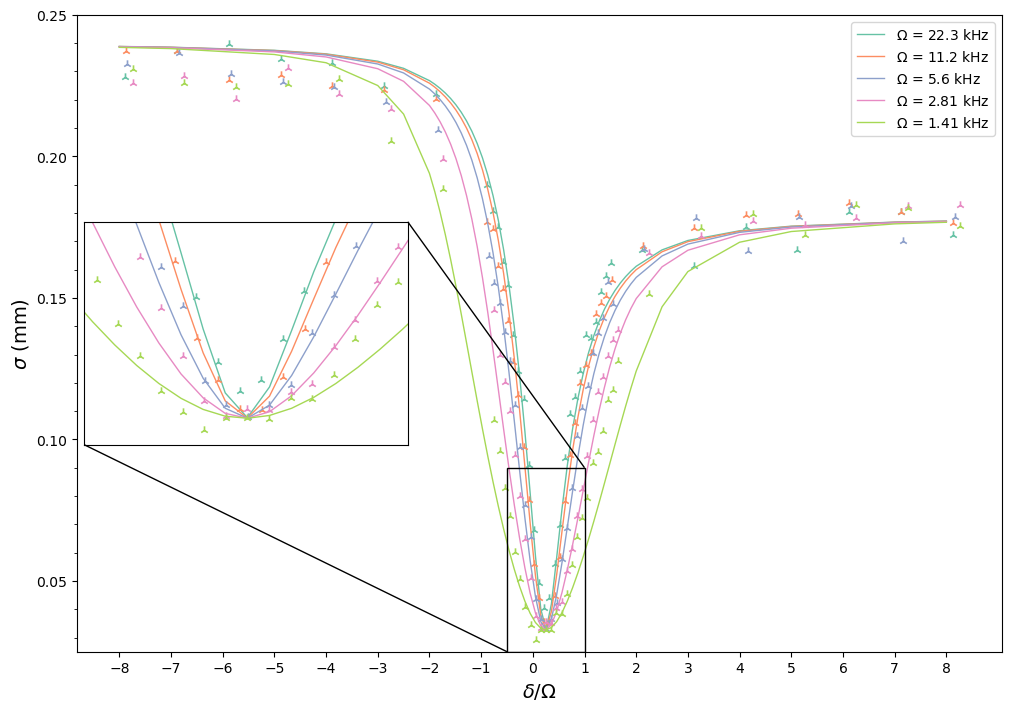

In [34]:
#initialize simulation results
en = np.ones((len(Omega_values),52))
size = np.ones((len(Omega_values),52))
pop = np.ones((len(Omega_values),52))
delta_values = np.ones((len(Omega_values),52))

location = r"C:\Users\Sarah\Documents\GitHub\Numerical-simulations\GPELab\plot_code\Export\MF_a11+1.65"
file = os.path.join(location, 'sim_0.txt')
en[0,:], size[0,:], pop[0,:], delta_values[0,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_1.txt')
en[1,:], size[1,:], pop[1,:], delta_values[1,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_2.txt')
en[2,:], size[2,:], pop[2,:], delta_values[2,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_3.txt')
en[3,:], size[3,:], pop[3,:], delta_values[3,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

file = os.path.join(location, 'sim_4.txt')
en[4,:], size[4,:], pop[4,:], delta_values[4,:] = np.genfromtxt(file, delimiter='\t', skip_header=1, comments='#', unpack=True)

#%%
colors = plt.get_cmap('Set2').colors
lw = 1

labels = [r'$\Omega$ = 22.3 kHz', r'$\Omega$ = 11.2 kHz', r'$\Omega$ = 5.6 kHz', r'$\Omega$ = 2.81 kHz', r'$\Omega$ = 1.41 kHz', r'$\Omega$ = 706 Hz']
shift = [0.12, 0.122, 0.158, 0.257, 0.257, 0.376]

figS, axS = plt.subplots(1,1,constrained_layout=True, figsize=(10,7))
for i in range(5):
    Om = Omega_values[i]*2*np.pi
    
    axS.plot(delta_values[i,:], size[i,:]*10**3, label=labels[i], lw=lw, color=colors[i], zorder=1)
    axS.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])

xticks = np.linspace(-8,8,17)
axS.set_xticks(xticks)    
axS.set_xlabel(r'$\delta/\Omega$', fontsize=14)
axS.set_ylabel(r'$\sigma$ (mm)', fontsize=14)  
axS.set_ylim(0.025, 0.25)  
axS.yaxis.set_major_locator(MultipleLocator(0.05))
axS.yaxis.set_major_formatter('{x:.2f}')
axS.yaxis.set_minor_locator(MultipleLocator(0.01))
axS.legend()

# Create inset zoomed-in plot
axins = inset_axes(axS, width="35%", height="35%", loc="center left")  # Adjust size and position
for i in range(5):
    axins.plot(delta_values[i,:], size[i,:]*10**3, lw=lw, color=colors[i], zorder=1)
    axins.scatter(scan_exp + shift[i], size_exp[i,:], lw=1.2, marker='2', color=colors[i])
# Set limits for zoomed-in region
axins.set_xlim(-0.5, 1)
axins.set_ylim(0.025, 0.09)
# Remove inset ticks for clarity
axins.set_xticks([])
axins.set_yticks([])
# Connect inset with main plot
mark_inset(axS, axins, loc1=1, loc2=3, fc="none", ec="black", lw=1)